<a href="https://colab.research.google.com/github/raviyadav44/PUBG_EDA/blob/main/EDA_on_zirconia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A brief about data fileds

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

#**Problem statement:** Predict the Price of diamond

In [30]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [31]:
from google.colab import drive
# drive.mount('/content/drive')

In [32]:
df=pd.read_csv("/content/drive/MyDrive/sem6/cubic_zirconia.csv")

In [33]:
df.size

296637

In [34]:
df.shape

(26967, 11)

In [35]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [36]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [37]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [38]:
df["depth"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
26962    False
26963    False
26964    False
26965    False
26966    False
Name: depth, Length: 26967, dtype: bool

In [39]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [40]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

###So we can see that there are 697 values which are null in the depth coloumn 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


Since we know the depth formula for a diamond is 
 depth  = z / mean(x, y) = 2 * z / (x + y) 

In [42]:
d=df[df.depth.isna()]
d

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [43]:
for i in range(d["depth"].size):
  g=d["z"].iloc[i]
  s=(d["x"].iloc[i]+d["y"].iloc[i])/2
  # print(g,s)
  d["depth"].iloc[i]=np.around(g/s,2)



In [44]:
indx=[]
for i in range(697):
  indx.append(d.index[i])

In [45]:

for i in range(697):
  df["depth"].iloc[indx[i]]=d["depth"].iloc[i]

In [46]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

So finally after replacing the nan values of depth with the appropriate value i.e. <br>depth = z / mean(x, y) = 2 * z / (x + y)

In [47]:
df1=df.copy()

In [48]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


##Univariat analysis

In [49]:
df1.nunique()

carat       257
cut           5
color         7
clarity       8
depth       182
table       112
x           531
y           526
z           356
price      8742
dtype: int64

so this gives us the unique values for all the columns

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

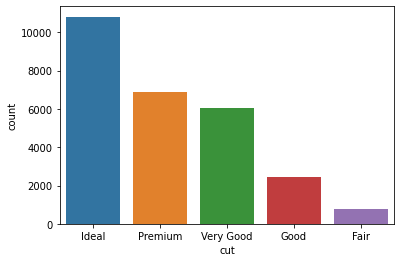

In [51]:
sns.countplot(x="cut",data=df1)

In [52]:
df1["cut"].value_counts()

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

So here we can see that most of the diamonds are of ideal cut and the order decreases as we go to the lower quality which indicates that most of the diamonds are of good quality.The reason for the most preferred cut ideal is because those diamonds are priced lower than other cuts. 

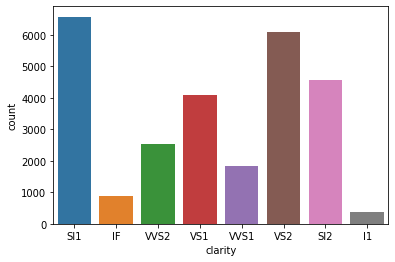

In [62]:
sns.countplot(x="clarity",data=df1)

In [63]:
df1["clarity"].value_counts()

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

So we can see that SI1 we the one with highest number of count and I1 be the lowest.

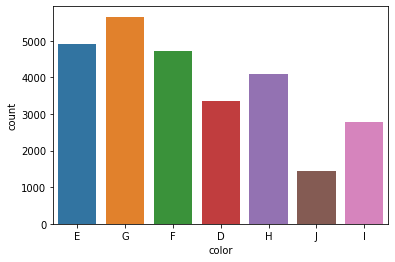

In [53]:
sns.countplot(x="color",data=df1)

In [54]:
df1["color"].value_counts()

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

Here these alphabets represents the color of different diamonds and we found that G with the highest number followed by E,F,H,D,I and J is the lowest.

##Distribution of Price based on different Features

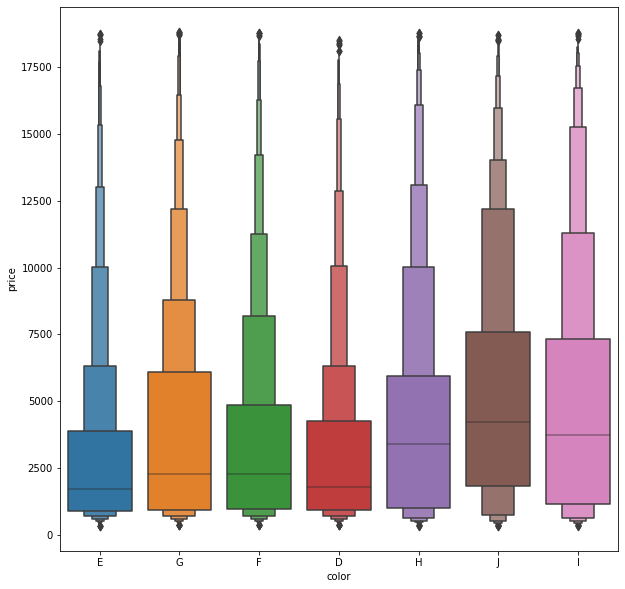

In [55]:
plt.figure(figsize=(10,10))
sns.boxenplot(x="color",y="price",data=df1)

This shows that there are many outliers when it comes to price by color and it is true that we cannot find the price on diamond only by color other important factors such as dimensions,carat and other important things altogether contribute to the Price.We have 7 colours in the data, The G seems to be the preferred colour,

We see the G is priced in the middle of the seven colours, whereas J being the worst colour price seems too high. CLARITY: Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

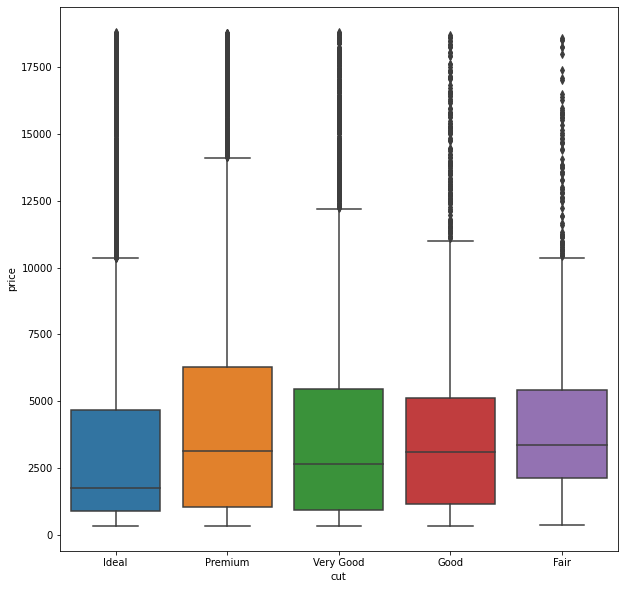

In [56]:
plt.figure(figsize=(10,10))
sns.boxplot("cut","price",data=df1)

here also outliers can we seen.

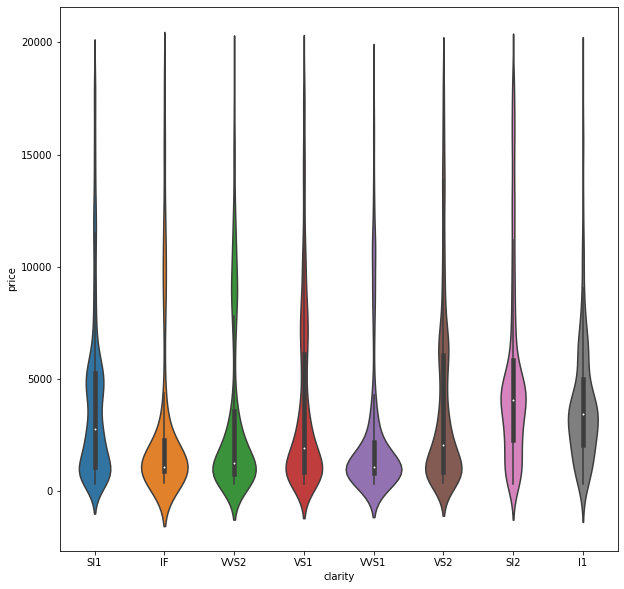

In [64]:
plt.figure(figsize=(10,10))
sns.violinplot(x="clarity", y="price", data=df1)

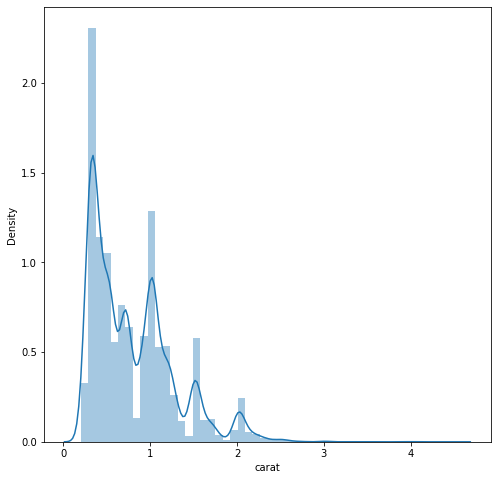

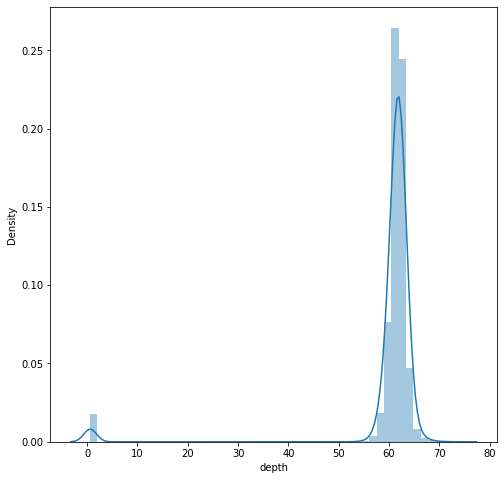

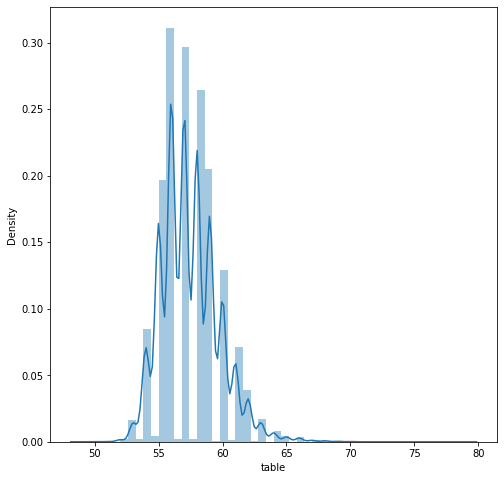

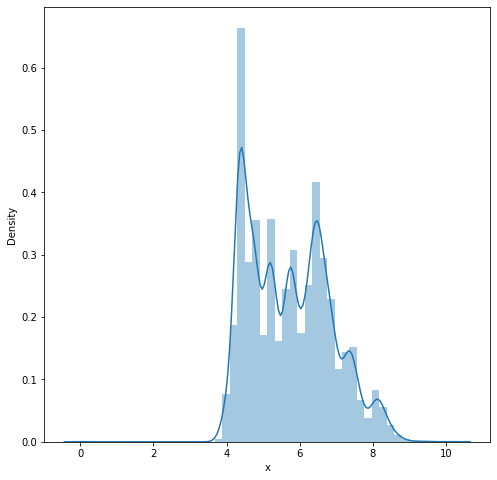

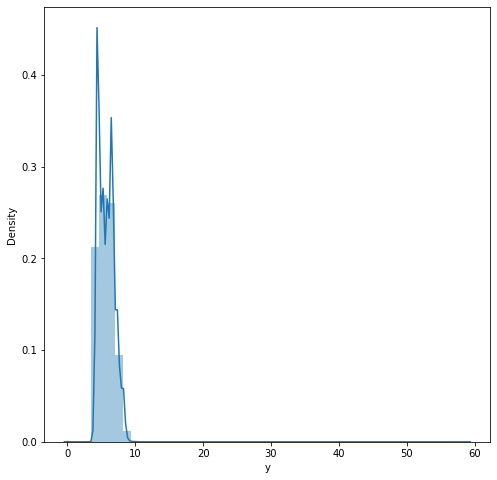

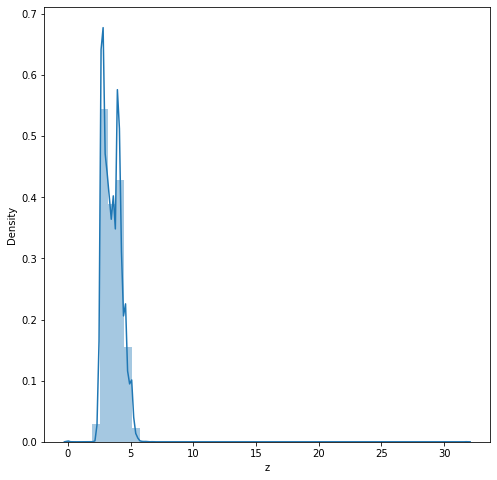

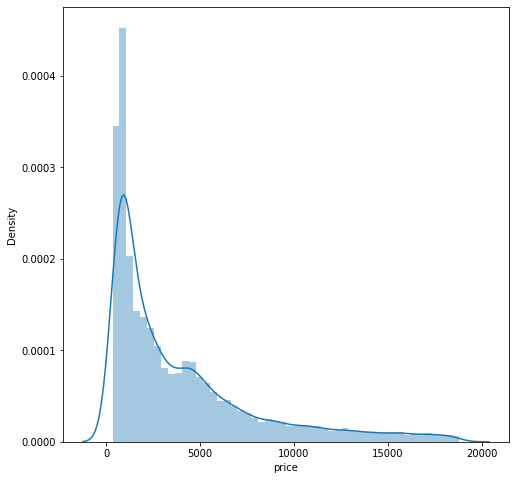

In [58]:
for cols in df.select_dtypes(include=np.number).columns.tolist():
  plt.figure(figsize=(8,8))
  sns.distplot(df1[cols])

So here we can see the distribution followed by different attributes in the data.<br>
  we can see that Price is rightly skewed also z and y are rightly skewed but that is not the case with the x ,x seems to be normally distributed with some spikes.<br>
  table and carat are following the normal distribution but are slightly right skewed and finally the depth is left skewed.

#Bivariate analysis

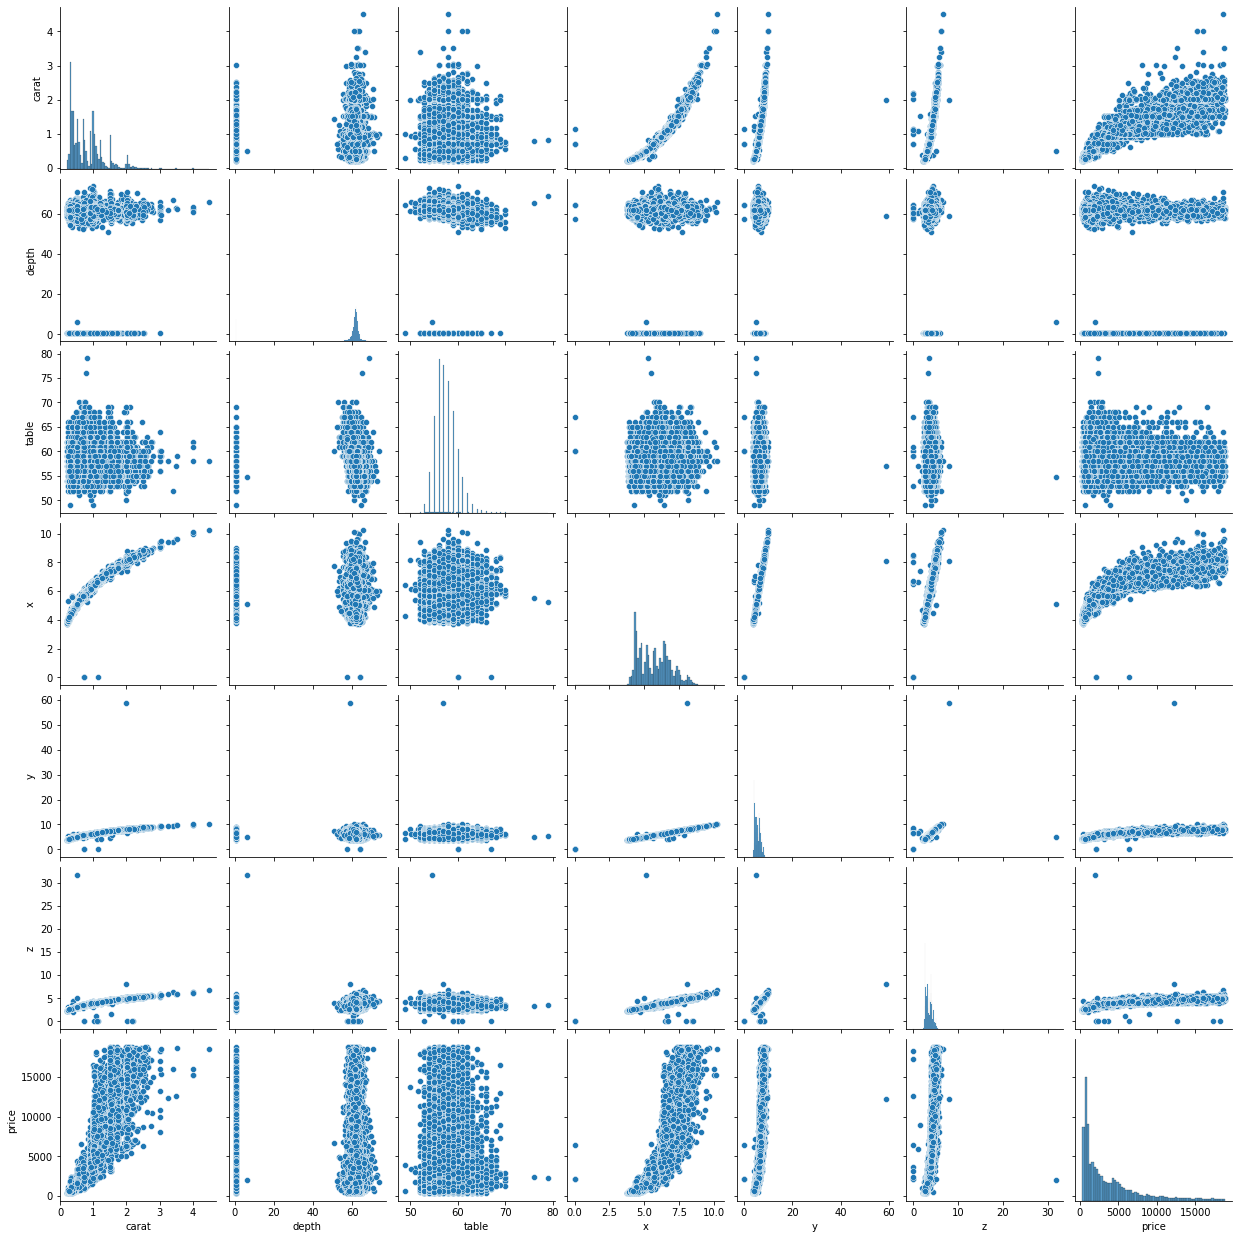

In [66]:
sns.pairplot(df1)

In [69]:
corrr=df1.corr()
corrr

,carat,depth,table,x,y,z,price
carat,1.000000,0.000110,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.000110,1.000000,-0.042064,-0.006334,-0.006623,0.002697,-0.002704
table,0.181685,-0.042064,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.006334,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.006623,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.002697,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002704,0.126942,0.886247,0.856243,0.850536,1.000000


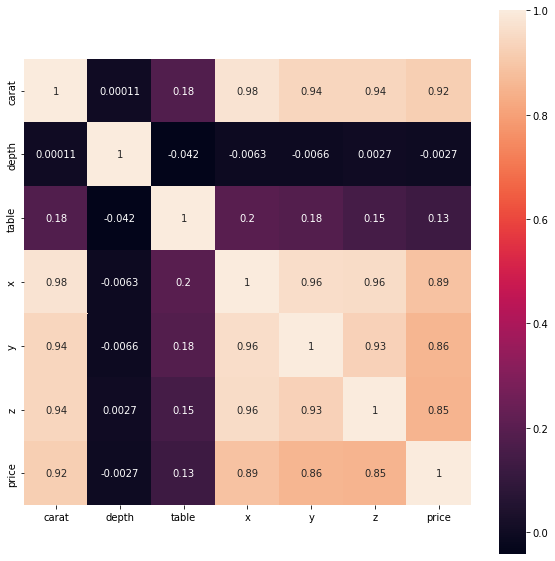

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(corrr,square=True,annot=True)

So the above heatmap shows us the correlation between different features of the dataset.This matrix clearly shows the presence of multi collinearity in the dataset.
